***
# **<center>Exercices#10</center>**
# ***<center>Traitement d'images</center>***
***

***
<u>Exercice 0:</u> *Microscopie électronique.* 

La microscopie électronique en transmission permet l'observation de nanoparticules, ici des nanospheres d'or. Une information importante est la distribution de taille de ces objets. On se propose, à partir de l'image fichiers_exercices_enonces/AL66b.tif de mettre en place un code qui detectera et mesurera automatiquement les dimensions des nanoparticules.

1- Ouvrir et afficher l'image fichiers_exercices_enonces/AL66b.tif avec opencv (img).  
2- Afficher les dimensions de l'image.  
3- Convertir l'image en niveaux de gris  (img_gray).  
4- Appliquer un filtre blur de kernel 5x5  (img_blur).  
5- Seuiller l'image à 140 sur 255 (threshold).  
6- Rechercher les contours sur l'image seuil et les afficher le contour d'indice zero sur l'image d'origine  
7- Afficher l'ensemble des contours sur l'image d'origine.  
8- Ajouter des rectangles contenant les contours pour faire des mesures ultérieurement.   
9- Ajouter à img les indices de chaque objet détèctés  avec la fonction cv2.putText.  
10- Afficher uniquement la zone de la barre d'echelle en selectionnant la plage de coordonnées de l'image. Relever les indices des caractères et de la barre d'échelle.    
11- Déterminer le numéro d'indice de la barre d'echelle et extraire:  
- Les coordonnées du centre de la barre
- La largeur du rectangle englobant
- La hauteur du rectangle englobant
- L'Angle du rectangle englobant
     
12- Utiliser la largeur extraite pour définir le ratio de conversion nm/pixel.  
13- A partir des valeurs relevées à la question 10 et de l'indice du tour de l'image relevé à la question 6, créer manuellement une liste d'indices à supprimer.  
14- créer une fonction "filtrer_contours" prenant en argument liste des contours a supprimer et les contours détecté par cv2.findContours précedemment, et  retournant les contours selectionnés.  
15- Charger à nouveau l'image fichiers_exercices_enonces/AL66b.tif et en utilisant la fonction "filtrer_contours" tracer les contours et les box uniquement des nanoparticules.  
16- On remarque que, quand les particules sont collées, on détecte des clusters.  On veut les supprimer, pour cela, on va les detecter par leur ratio de convexité.  
Mesurer le ratio entre la surface du contour calculé avec cv2.convexHull(cnt) et la surface du contour.
Creer une liste des ratios de convexité et afficher l'histogramme.   
17- Voit-on des valeurs très inferieures à 1? Si c'est le cas, les objets detectès sont concaves, donc non circulaires. Les supprimer, par exemple, avec une condition np.where et l'utilisation de la fonction filtrer_contours.  
18- Extraire pour l'ensemble des contours, les valeurs en nm de: 
- hauteurs
- largeurs
- convexites
- x_positions
- y_positions
- surfaces
- ratios_hauteur_largeur

Stocker ces résultats dans un pandas dataframe.  
19- Afficher les histogrammes pour chaque grandeur.  
20- Faire un ajustement par une gaussienne des valeurs de hauteur et de largeur.  
21- Afficher une matrice de correlation.

 ***<center>SOLUTION</center>***

1- Ouvrir et afficher l'image fichiers_exercices_enonces/AL66b.tif avec opencv (img) 

In [1]:
import cv2

In [2]:
img = cv2.imread("fichier_exercices_enonces/10_traitementimage/AL66a.bmp")

cv2.imshow("Image Origine", img)
k = cv2.waitKey(0)

![origine](fichier_exercices_enonces/corrections/opencv/origine.png)

2- Afficher les dimensions de l'image  

In [3]:
height, width, channels = img.shape

print("Largeur de l'image:", width)
print("Hauteur de l'image:", height)
print("Nombre de canaux de couleur:", channels)

Largeur de l'image: 900
Hauteur de l'image: 600
Nombre de canaux de couleur: 3


3- Convertir l'image en niveaux de gris  (img_gray)

In [4]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
cv2.imshow("Image niveaux gris", img_gray)
k = cv2.waitKey(0)

![seuil](fichier_exercices_enonces/corrections/opencv//gris.png)

4- Appliquer un filtre blur de kernel 5x5  (img_blur) 

In [5]:
img_blur = cv2.blur(img_gray,(5,5))  
cv2.imshow("Image blur", img_blur)
k = cv2.waitKey(0)

![blur](fichier_exercices_enonces/corrections/opencv/blur.png)

5- Seuiller l'image à 140 sur 255 (threshold) 

In [6]:
ret1,threshold=cv2.threshold(img_blur,140,255,cv2.THRESH_BINARY)  
cv2.imshow("seuillage",threshold)
k = cv2.waitKey(0)

![seuil](fichier_exercices_enonces/corrections/opencv/seuil.png)

6- Rechercher les contours sur l'image seuil et les afficher le contour d'indice zero sur l'image d'origine

In [7]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, [contours[0]], 0, (255, 0, 0), 2)
# Afficher l'image avec le contour spécifique
cv2.imshow("Contour 0", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![contour0](fichier_exercices_enonces/corrections/opencv/contour0.png)

7- Afficher l'ensemble des contours sur l'image d'origine

In [8]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(img, [cnt], 0, (255, 0, 0), 1)

# Afficher l'image avec le contour spécifique
cv2.imshow("Contours", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


![contours](fichier_exercices_enonces/corrections/opencv/contours.png)

8- Ajouter des rectangles contenant les contours pour faire des mesures ultérieurement

In [9]:
import numpy as np
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge

cv2.imshow("Image Box", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![box](fichier_exercices_enonces/corrections/opencv/box.png)

9- Ajouter à img les indices de chaque objet détectés  avec la fonction cv2.putText  

In [10]:
for i, contour in enumerate(contours):
    x, y = contour[0][0] # determiner les coordonnées du premier point du contour
    #  Afficher le numéro du contour
    cv2.putText(img, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imshow("Numeros Contours", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


![numeros](fichier_exercices_enonces/corrections/opencv/numeros.png)

10- Afficher uniquement la zone de la barre d'echelle en selectionnant la plage de coordonnées de l'image. Relever les indices des caractères et de la barre d'échelle.

In [11]:
# Définir les coordonnées de la zone d'intérêt
x_start, x_end = 0, 200
y_start, y_end = 500, 600

# Extraire la région d'intérêt (ROI)
roi = img[y_start:y_end, x_start:x_end]

cv2.namedWindow("Region of Interest", cv2.WINDOW_NORMAL) # cv2.WINDOW_NORMAL pour fenetre étirable
# Afficher la région d'intérêt
cv2.imshow("Region of Interest", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

![roi](fichier_exercices_enonces/corrections/opencv/roi.png)

11- Déterminer le numéro d'indice de la barre d'echelle et extraire:  
- Les coordonnées du centre de la barre
- La largeur du rectangle englobant
- La hauteur du rectangle englobant
- L'Angle du rectangle englobant

In [12]:
# Obtenir le rectangle englobant orienté
rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect)
box = np.round(box).astype(int)

In [13]:
indice_echelle = 2
contour_echelle = contours[indice_echelle]


# Obtenir le rectangle englobant orienté
rect = cv2.minAreaRect(contour_echelle)
box = cv2.boxPoints(rect)
box = np.round(box).astype(int)


 # Extraire les coordonnées, la largeur, la hauteur et l'angle du rectangle englobant
center, size, angle = rect
width, height = size

# Afficher toutes les grandeurs extraites
print(f"Coordonnées du centre : {center}")
print(f"largeur du rectangle englobant : {width:.2f} pixels")
print(f"hauteur du rectangle englobant : {height:.2f} pixels")
print(f"Angle du rectangle englobant : {angle:.2f} degrés")




Coordonnées du centre : (82.5, 583.0)
largeur du rectangle englobant : 141.00 pixels
hauteur du rectangle englobant : 8.00 pixels
Angle du rectangle englobant : 0.00 degrés


On vérifie bien que l'angle est à zero, donc horizontal, les coordonnées du centre semblent correspondre, ceci confirme que l'ov=jet detecté est bien la barre d'echelle et pourra être utilisé pour les mesures des objets.

12- Utiliser la largeur extraite pour définir le ratio de conversion nm/pixel

In [14]:
ratio = 50/width # 50nm , valeur lue sur l'image

13- A partir des valeurs relevées à la question 10 et de l'indice du tour de l'image relevé à la question 6, créer manuellement une liste d'indices à supprimer. 

In [15]:
indices_a_supprimer = [0, 2, 8, 9, 10, 5, 6]

14- créer une fonction "filtrer_contours" prenant en argument liste des contours a supprimer et les contours détecté par cv2.findContours précedemment, et  retournant les contours selectionnés.

In [16]:
def filtrer_contours(indices_a_supprimer, contours):
    # Créer une liste de contours filtrée en utilisant une liste de compréhension
    contours_selection = [contour for i, contour in enumerate(contours) if i not in indices_a_supprimer]
    return contours_selection

15- Charger à nouveau l'image fichiers_exercices_enonces/AL66b.tif et en utilisant la fonction "filtrer_contours" tracer les contours et les box uniquement des nanoparticules. 

In [17]:
img = cv2.imread("fichier_exercices_enonces/10_traitementimage/AL66a.bmp")

In [18]:
indices_a_supprimer = [0, 2, 8, 9, 10, 5, 6]
#Utilisation de la fonction déterminée à la question 14
contours_selectionnes = filtrer_contours(indices_a_supprimer, contours)

# Afficher l'image avec les contours d'indices spécifiés
for cnt in contours_selectionnes:
    cv2.drawContours(img, [cnt], 0, (255, 0, 0), 1)
    
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)

    # Extraire les coordonnées, la largeur, la hauteur et l'angle du rectangle englobant
    center, size, angle = rect
    width, height = size

    # Dessiner le rectangle englobant orienté sur l'image
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge

cv2.imshow("Contours Select", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![select](fichier_exercices_enonces/corrections/opencv/select.png)

16- On remarque que, quand les particules sont collées, on détecte des clusters.  On veut les supprimer, pour cela, on va les detecter par leur ratio de convexité.  
Mesurer le ratio entre la surface du contour calculé avec cv2.convexHull(cnt) et la surface du contour.
Creer une liste des ratios de convexité et afficher l'histogramme.

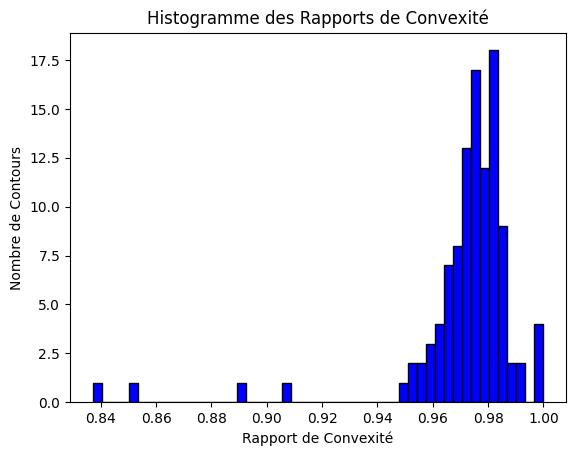

In [19]:
import matplotlib.pyplot as plt
convexity_ratios = []
for cnt in contours_selectionnes:
    # Calculer le polygone convexe
    hull = cv2.convexHull(cnt)

    # Calculer la surface du polygone convexe et la surface du contour d'origine
    area_hull = cv2.contourArea(hull)
    area_contour = cv2.contourArea(cnt)
    # Calculer le rapport de convexité
    convexity_ratio = area_contour / area_hull
        # Ajouter le rapport de convexité à la liste
    convexity_ratios.append(convexity_ratio)
    

# Tracer l'histogramme
plt.hist(convexity_ratios, bins=50, color='blue', edgecolor='black')
plt.title('Histogramme des Rapports de Convexité')
plt.xlabel('Rapport de Convexité')
plt.ylabel('Nombre de Contours')
plt.show()




17- Voit-on des valeurs très inferieures à 1? Si c'est le cas, les objets detectès sont concaves, donc non circulaires. Les supprimer, par exemple, avec une condition np.where et l'utilisation de la fonction filtrer_contours

In [21]:
seuil_convexite = 0.92
# Utiliser np.where pour obtenir les indices inférieurs au seuil
indices_sous_seuil = np.where(np.array(convexity_ratios) < seuil_convexite)[0]

# Afficher les indices inférieurs à 0.92
print("Indices inférieurs  des objets de convexité inferieure à 0.92 :", indices_sous_seuil)

Indices inférieurs  des objets de convexité inferieure à 0.92 : [ 24  32  60 100]


In [22]:
contours_selectionnes = filtrer_contours(indices_sous_seuil,contours_selectionnes)

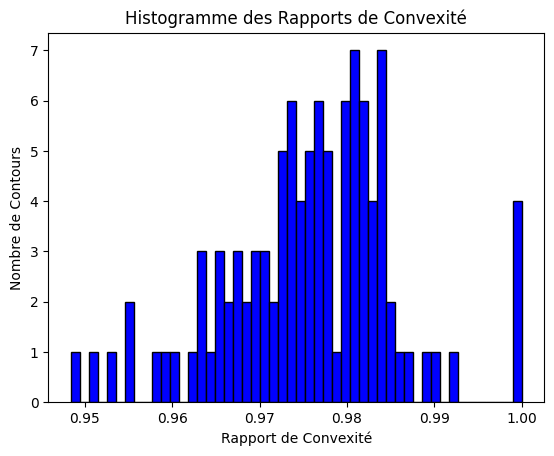

In [23]:
convexity_ratios = []
for cnt in contours_selectionnes:
    # Calculer le polygone convexe
    hull = cv2.convexHull(cnt)

    # Calculer la surface du polygone convexe et la surface du contour d'origine
    area_hull = cv2.contourArea(hull)
    area_contour = cv2.contourArea(cnt)
    # Calculer le rapport de convexité
    convexity_ratio = area_contour / area_hull
        # Ajouter le rapport de convexité à la liste
    convexity_ratios.append(convexity_ratio)
    

# Tracer l'histogramme
plt.hist(convexity_ratios, bins=50, color='blue', edgecolor='black')
plt.title('Histogramme des Rapports de Convexité')
plt.xlabel('Rapport de Convexité')
plt.ylabel('Nombre de Contours')
plt.show()


verifier visuellement que les clusters ont été supprimés

In [24]:
img = cv2.imread("fichier_exercices_enonces/10_traitementimage/AL66a.bmp")
for cnt in contours_selectionnes:
    cv2.drawContours(img, [cnt], 0, (255, 0, 0), 1)
    
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    # rect = cv2.fitEllipse(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)

    # Extraire les coordonnées, la largeur, la hauteur et l'angle du rectangle englobant
    center, size, angle = rect
    width, height = size

    # Dessiner le rectangle englobant orienté sur l'image
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge

cv2.imshow("Contours select2", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![select2](fichier_exercices_enonces/corrections/opencv/select2.png)

18- Extraire pour l'ensemble des contours, les valeurs en nm de: 
- hauteurs
- largeurs
- convexites
- x_positions
- y_positions
- surfaces
- ratios_hauteur_largeur

Stocker ces résultats dans un pandas dataframe

In [25]:
# Créer des listes vides pour chaque grandeur
hauteurs = []
largeurs = []
convexites = []
x_positions = []
y_positions = []
surfaces = []
perimetres = []
ratios_hauteur_largeur = []

# Parcourir les contours sélectionnés
for cnt in contours_selectionnes:
    # Calculer les grandeurs pour chaque contour
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    center, size, angle = rect
    width, height = size

    # Mise à l'échelle des résultats
    width_scaled = width * ratio
    height_scaled = height * ratio

    # Calculer la surface
    surface = cv2.contourArea(cnt) * ratio * ratio

    #calcul du perimetre
    # Calculer le périmètre du contour
    perimetre = cv2.arcLength(cnt, closed=True)
    perimetre_scaled = perimetre*ratio

    # Calculer le convex hull
    hull = cv2.convexHull(cnt)

    # Calculer la convexité en utilisant le ratio de la surface du contour sur la surface du convex hull
    convexity_ratio = surface / (cv2.contourArea(hull) * ratio * ratio)

    # Calculer le ratio hauteur/largeur
    ratio_hauteur_largeur = height_scaled / width_scaled

    # Ajouter les résultats aux listes
    hauteurs.append(height_scaled)
    largeurs.append(width_scaled)
    convexites.append(convexity_ratio)
    x_positions.append(center[0] * ratio)
    y_positions.append(center[1] * ratio)
    surfaces.append(surface)
    perimetres.append(perimetre_scaled)
    ratios_hauteur_largeur.append(ratio_hauteur_largeur)

In [30]:
import pandas as pd
# Créer un DataFrame Pandas avec les résultats
data = {
    'Hauteur (nm)': hauteurs,
    'Largeur (nm)': largeurs,
    'Ratio Hauteur/Largeur' : ratios_hauteur_largeur,
    'Convexité': convexites,
    'X Position (nm)': x_positions,
    'Y Position (nm)': y_positions,
    'Surface (nm²)': surfaces,
    'Perimetre (nm)': perimetres
}

df = pd.DataFrame(data)
df.head()

,Hauteur (nm),Largeur (nm),Ratio Hauteur/Largeur,Convexité,X Position (nm),Y Position (nm),Surface (nm²),Perimetre (nm)
0,5.265688,5.265688,1.000000,0.974930,245.744702,208.333355,22.005935,17.537533
1,4.011953,4.262700,0.941176,0.951327,179.343993,203.102859,13.517932,14.199160
2,6.028369,6.382979,0.944444,0.971545,195.744681,202.659574,30.053820,20.668181
3,4.609929,4.255319,1.083333,0.980545,117.375887,191.312057,15.844273,14.822337
4,1.418440,2.127660,0.666667,1.000000,140.425532,186.524823,2.389216,5.845844


19- Afficher les histogrammes pour chaque grandeur

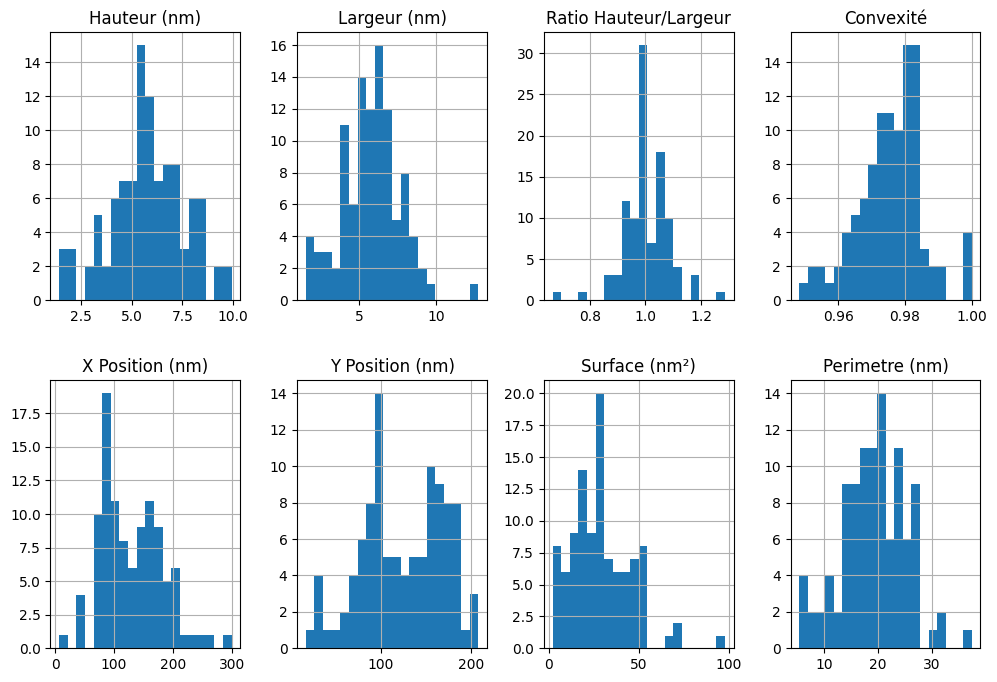

In [31]:
df.hist(bins=20, figsize=(12,8), layout=(2, 4)) # bins représente le nombre de barres de l'histogramme
plt.show()

20- Faire un ajustement par une gaussienne les valeurs de hauteur et de largeur

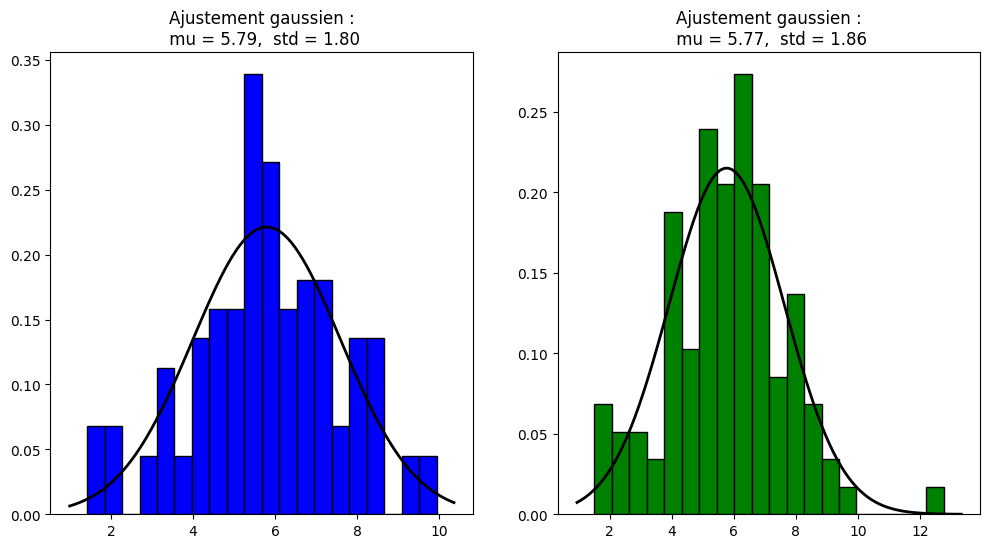

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Nombre de bacs pour l'histogramme
bins = 20

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme pour la hauteur
hist_height, bin_edges_height, _ = axes[0].hist(df['Hauteur (nm)'], bins=bins, color='blue', edgecolor='black', density=True)
axes[0].set_title('Hauteur (nm)')

# Ajuster une gaussienne aux données de hauteur
mu_height, std_height = norm.fit(df['Hauteur (nm)'])
#definir les valeurs des x à partir de l'axe des abcisses de l'histogramme
xmin_height, xmax_height = axes[0].get_xlim()
x_height = np.linspace(xmin_height, xmax_height, 100)
p_height = norm.pdf(x_height, mu_height, std_height)
# tracer la gaussienne
axes[0].plot(x_height, p_height, 'k', linewidth=2)
title_height = "Ajustement gaussien :\n mu = %.2f,  std = %.2f" % (mu_height, std_height)
axes[0].set_title(title_height)

# Histogramme pour la largeur
hist_width, bin_edges_width, _ = axes[1].hist(df['Largeur (nm)'], bins=bins, color='green', edgecolor='black', density=True)
axes[1].set_title('Largeur (nm)')

# Ajuster une gaussienne aux données de largeur
mu_width, std_width = norm.fit(df['Largeur (nm)'])
xmin_width, xmax_width = axes[1].get_xlim()
x_width = np.linspace(xmin_width, xmax_width, 100)
p_width = norm.pdf(x_width, mu_width, std_width)
axes[1].plot(x_width, p_width, 'k', linewidth=2)
title_width = "Ajustement gaussien :\n mu = %.2f,  std = %.2f" % (mu_width, std_width)
axes[1].set_title(title_width)

# Afficher la figure
plt.show()


21- Afficher une matrice de correlation

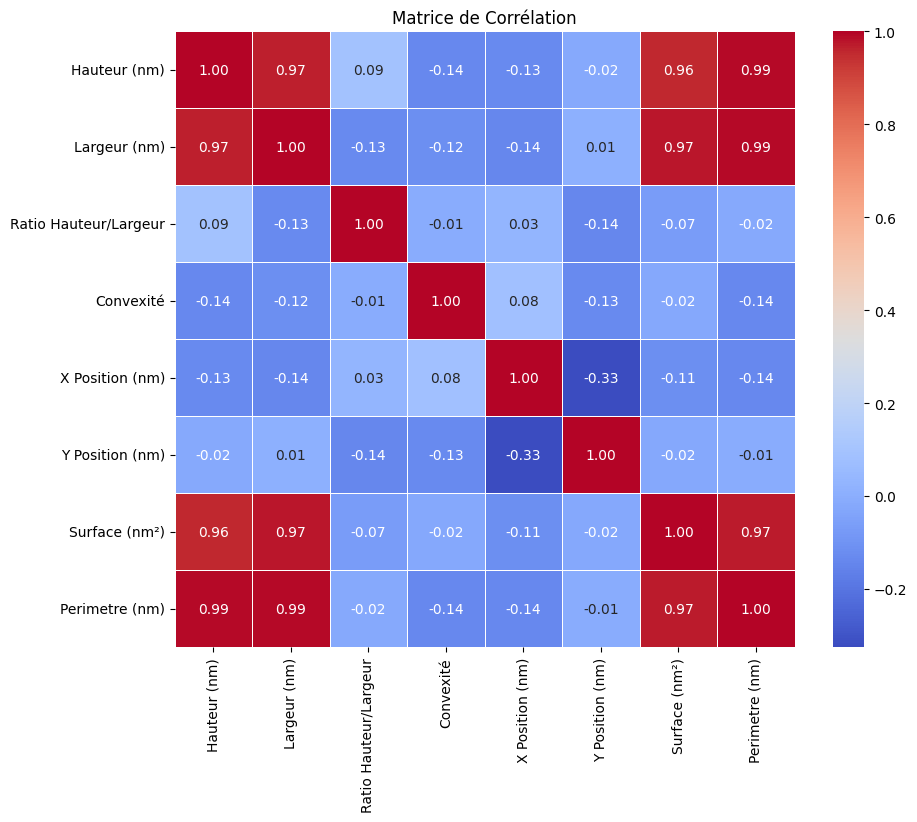

In [33]:
import seaborn as sns
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

***
<u>Exercice 1:</u> *Detection d'objets dans une vidéo.*   

1- Charger la video "fichiers_cours/ma_video.mp4" et la visionner.  
2- Faire un filtre HSV pour créer un masque ne détectant que les balles bleues sur l'image 


 ***<center>SOLUTION</center>***

1- Charger la video "fichiers_cours/ma_video.mp4" et la visionner.  

In [26]:
# detection de balles bleues
import cv2
import numpy as np

# Chemin vers le fichier vidéo
video_path = "../fichiers_cours/traitement_image/ma_video.mp4"
# Charger la vidéo
cap = cv2.VideoCapture(video_path)

# Boucle pour lire chaque frame de la vidéo
while True:
    # Lire une frame
    ret, frame = cap.read()
    
    # Quitter la boucle si la frame n'est pas lue correctement
    if not ret:
        break
 
    # Afficher la frame en niveaux de gris
    cv2.imshow('Ma Video',frame)
    
    # Attendre la touche 'q' pour quitter la boucle
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer la capture vidéo
cap.release()

# Fermer toutes les fenêtres
cv2.destroyAllWindows()

2- Faire un filtre HSV pour créer un masque ne détectant que les balles bleues sur l'image 

In [1]:
# detection de balles bleues
import cv2
import numpy as np

# Chemin vers le fichier vidéo
video_path = "../fichiers_cours/traitement_image/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Convertir l'image en niveaux de gris
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Convertir l'image en HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    # Plage de valeurs HSV pour le bleu vif
    lower_blue = np.array([50, 100, 150])
    upper_blue = np.array([100, 255, 255])

    # Créer un masque pour les pixels rouges
    blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

    # Appliquer le masque à l'image originale
    balles_bleues = cv2.bitwise_and(frame, frame, mask=blue_mask)

    # Afficher l'image avec les voitures rouges
    cv2.imshow("Balles bleues", balles_bleues)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()